<a href="https://colab.research.google.com/github/RajkumarGalaxy/StructuredData/blob/master/Datetime_Parsing_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datetime Parsing with Pandas


References:

https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import ForestFire time-series data file

In [2]:
url = 'https://raw.githubusercontent.com/RajkumarGalaxy/dataset/master/TimeSeries/Algerian_forest_fires.csv'
forestfire = pd.read_csv(url)
forestfire.sample(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
91,31,8,2012,28,80,21,16.8,52.5,8.7,8.7,0.6,8.3,0.3,not fire
66,6,8,2012,32,75,14,0.0,86.4,13.0,39.1,5.2,14.2,6.8,fire
59,30,7,2012,31,79,15,0.0,85.4,28.5,136.0,4.7,37.4,10.7,fire
32,3,7,2012,32,76,20,0.7,63.1,2.6,9.2,1.3,3.0,0.5,not fire
98,7,9,2012,31,71,17,0.3,69.6,3.2,30.1,1.5,5.1,0.6,not fire
38,9,7,2012,32,68,14,1.4,66.6,7.7,9.2,1.1,7.4,0.6,not fire
14,15,6,2012,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0.1,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
70,10,8,2012,35,55,14,0.0,88.9,18.6,67.0,7.4,21.9,11.6,fire
39,10,7,2012,33,69,13,0.7,66.6,6.0,9.3,1.1,5.8,0.5,not fire


In [3]:
forestfire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
 13  Classes      122 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 13.5+ KB


In [4]:
forestfire['date'] = pd.to_datetime(forestfire[['day', 'month', 'year']])
forestfire.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,2012-06-01
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,2012-06-02
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,2012-06-03
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,2012-06-04
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,2012-06-05


In [5]:
forestfire.drop(columns=['day','month','year'], inplace=True)
forestfire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  122 non-null    int64         
 1    RH          122 non-null    int64         
 2    Ws          122 non-null    int64         
 3   Rain         122 non-null    float64       
 4   FFMC         122 non-null    float64       
 5   DMC          122 non-null    float64       
 6   DC           122 non-null    float64       
 7   ISI          122 non-null    float64       
 8   BUI          122 non-null    float64       
 9   FWI          122 non-null    float64       
 10  Classes      122 non-null    object        
 11  date         122 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(3), object(1)
memory usage: 11.6+ KB


In [6]:
days = forestfire['date'].dt.day
months = forestfire['date'].dt.month
years = forestfire['date'].dt.year

recon = pd.DataFrame(zip(days,months,years), columns = ['DAY','MONTH','YEAR'])
recon.head()

,DAY,MONTH,YEAR
0,1,6,2012
1,2,6,2012
2,3,6,2012
3,4,6,2012
4,5,6,2012


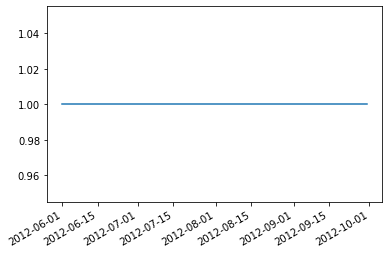

In [7]:
forestfire['date'].value_counts().plot.line()

2012-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2012-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2012-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2012-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: M, Name: date, dtype: object

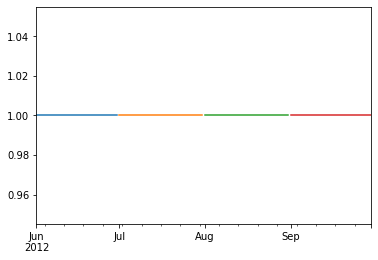

In [8]:
forestfire['date'].value_counts().resample('M').plot.line()

## Air Quality Time-series Dataset 

In [13]:
airquality_url = 'https://raw.githubusercontent.com/RajkumarGalaxy/dataset/master/TimeSeries/AirQualityUCI.csv'
# read first 5 columns for better visual clarity
airquality = pd.read_csv(airquality_url, sep=';').iloc[:,:5]
airquality.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT)
0,10/03/2004,18.00.00,"2,6",1360.0,150.0
1,10/03/2004,19.00.00,2,1292.0,112.0
2,10/03/2004,20.00.00,"2,2",1402.0,88.0
3,10/03/2004,21.00.00,"2,2",1376.0,80.0
4,10/03/2004,22.00.00,"1,6",1272.0,51.0


In [10]:
airquality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         9357 non-null   object 
 1   Time         9357 non-null   object 
 2   CO(GT)       9357 non-null   object 
 3   PT08.S1(CO)  9357 non-null   float64
 4   NMHC(GT)     9357 non-null   float64
dtypes: float64(2), object(3)
memory usage: 370.1+ KB


In [14]:
airquality['DATE'] = pd.to_datetime(airquality['Date'], format='%d/%m/%Y')
airquality['TIME'] = pd.to_datetime(airquality['Time'], format='%H.%M.%S')


In [15]:
airquality.drop(columns=['Date', 'Time'], inplace=True)
airquality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CO(GT)       9357 non-null   object        
 1   PT08.S1(CO)  9357 non-null   float64       
 2   NMHC(GT)     9357 non-null   float64       
 3   DATE         9357 non-null   datetime64[ns]
 4   TIME         9357 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 370.1+ KB


In [16]:
airquality['DAY'] = airquality['DATE'].dt.day
airquality['MONTH'] = airquality['DATE'].dt.month
airquality['YEAR'] = airquality['DATE'].dt.year

airquality['HOUR'] = airquality['TIME'].dt.hour
airquality['MINUTE'] = airquality['TIME'].dt.minute
airquality['SECOND'] = airquality['TIME'].dt.second

airquality.drop(columns=['DATE', 'TIME'], inplace=True)
airquality.head()

,CO(GT),PT08.S1(CO),NMHC(GT),DAY,MONTH,YEAR,HOUR,MINUTE,SECOND
0,"2,6",1360.0,150.0,10.0,3.0,2004.0,18.0,0.0,0.0
1,2,1292.0,112.0,10.0,3.0,2004.0,19.0,0.0,0.0
2,"2,2",1402.0,88.0,10.0,3.0,2004.0,20.0,0.0,0.0
3,"2,2",1376.0,80.0,10.0,3.0,2004.0,21.0,0.0,0.0
4,"1,6",1272.0,51.0,10.0,3.0,2004.0,22.0,0.0,0.0


In [17]:
airquality['parsed'] = pd.to_datetime(airquality[['DAY','MONTH','YEAR','HOUR','MINUTE','SECOND']])
airquality.head()

,CO(GT),PT08.S1(CO),NMHC(GT),DAY,MONTH,YEAR,HOUR,MINUTE,SECOND,parsed
0,"2,6",1360.0,150.0,10.0,3.0,2004.0,18.0,0.0,0.0,2004-03-10 18:00:00
1,2,1292.0,112.0,10.0,3.0,2004.0,19.0,0.0,0.0,2004-03-10 19:00:00
2,"2,2",1402.0,88.0,10.0,3.0,2004.0,20.0,0.0,0.0,2004-03-10 20:00:00
3,"2,2",1376.0,80.0,10.0,3.0,2004.0,21.0,0.0,0.0,2004-03-10 21:00:00
4,"1,6",1272.0,51.0,10.0,3.0,2004.0,22.0,0.0,0.0,2004-03-10 22:00:00


In [25]:
airquality['formatted_date'] = pd.to_datetime(airquality[['DAY','MONTH','YEAR','HOUR','MINUTE','SECOND']]).dt.strftime('%d %b %Y, %I.%M.%S %p')
# display last 8 columns only for better visual clarity
airquality.head().iloc[:,-8:]

,DAY,MONTH,YEAR,HOUR,MINUTE,SECOND,parsed,formatted_date
0,10.0,3.0,2004.0,18.0,0.0,0.0,2004-03-10 18:00:00,"10 Mar 2004, 06.00.00 PM"
1,10.0,3.0,2004.0,19.0,0.0,0.0,2004-03-10 19:00:00,"10 Mar 2004, 07.00.00 PM"
2,10.0,3.0,2004.0,20.0,0.0,0.0,2004-03-10 20:00:00,"10 Mar 2004, 08.00.00 PM"
3,10.0,3.0,2004.0,21.0,0.0,0.0,2004-03-10 21:00:00,"10 Mar 2004, 09.00.00 PM"
4,10.0,3.0,2004.0,22.0,0.0,0.0,2004-03-10 22:00:00,"10 Mar 2004, 10.00.00 PM"


## Landslide Dataset

In [47]:
url = 'https://raw.githubusercontent.com/RajkumarGalaxy/dataset/master/TimeSeries/landslides_data.csv'
# load limited features only - for better visual clarity
landslides = pd.read_csv(url).loc[:,['date', 'country_code', 'state/province', 'hazard_type']]
landslides.head()

,date,country_code,state/province,hazard_type
0,03-02-2007,US,Virginia,Landslide
1,3/22/07,US,Ohio,Landslide
2,04-06-2007,US,Pennsylvania,Landslide
3,4/14/07,CA,Quebec,Landslide
4,4/15/07,US,Kentucky,Landslide


In [48]:
length = landslides['date'].str.len()
length.value_counts()

7.0     818
10.0    649
8.0     219
16.0      3
17.0      1
Name: date, dtype: int64

In [49]:
ind_7 = np.where([length==7])[1][0]
ind_8 = np.where([length==8])[1][0]
ind_10 = np.where([length==10])[1][0]
ind_16 = np.where([length==16])[1][0]
ind_17 = np.where([length==17])[1][0]

# load one example row for each date length
landslides.loc[[ind_7,ind_8,ind_10,ind_16,ind_17]]

,date,country_code,state/province,hazard_type
1,3/22/07,US,Ohio,Landslide
48,10/13/07,CO,Cauca,Landslide
0,03-02-2007,US,Virginia,Landslide
343,5/14/10 05:00:00,US,Missouri,Landslide
826,10/25/11 09:30:00,TT,San Juan/Laventille,Landslide


In [50]:
drop_ind = np.where([length>=16])[1]
landslides.drop(index=drop_ind, inplace=True)


In [51]:
length = landslides['date'].str.len()
length.value_counts()

7.0     818
10.0    649
8.0     219
Name: date, dtype: int64

In [52]:
landslides['parsed_date'] = pd.to_datetime(landslides['date'], infer_datetime_format=True)
landslides.head()

,date,country_code,state/province,hazard_type,parsed_date
0,03-02-2007,US,Virginia,Landslide,2007-03-02
1,3/22/07,US,Ohio,Landslide,2007-03-22
2,04-06-2007,US,Pennsylvania,Landslide,2007-04-06
3,4/14/07,CA,Quebec,Landslide,2007-04-14
4,4/15/07,US,Kentucky,Landslide,2007-04-15


In [54]:
landslides.drop(columns=['date'], inplace=True)
landslides.head()

,country_code,state/province,hazard_type,parsed_date
0,US,Virginia,Landslide,2007-03-02
1,US,Ohio,Landslide,2007-03-22
2,US,Pennsylvania,Landslide,2007-04-06
3,CA,Quebec,Landslide,2007-04-14
4,US,Kentucky,Landslide,2007-04-15


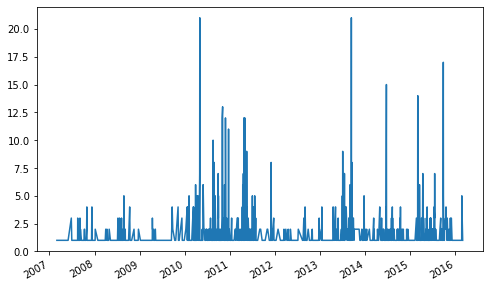

In [57]:
plt.figure(figsize=(8,5))
landslides['parsed_date'].value_counts().sort_values().plot.line()
plt.show()

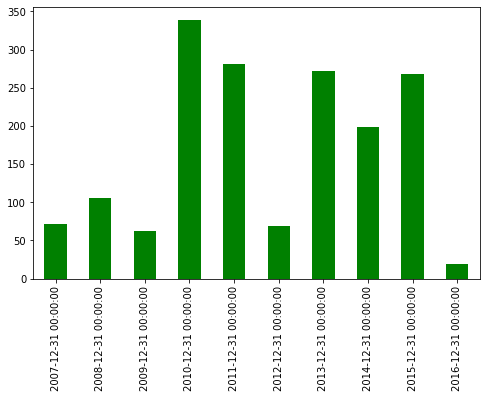

In [66]:
plt.figure(figsize=(8,5))
landslides['parsed_date'].value_counts().resample('Y').sum().plot.bar(color='g')
plt.show()

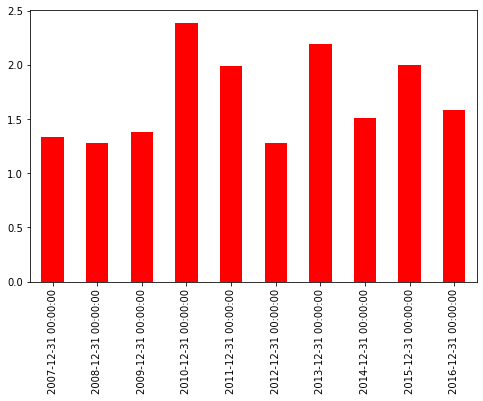

In [68]:
plt.figure(figsize=(8,5))
landslides['parsed_date'].value_counts().resample('Y').mean().plot.bar(color='r')
plt.show()

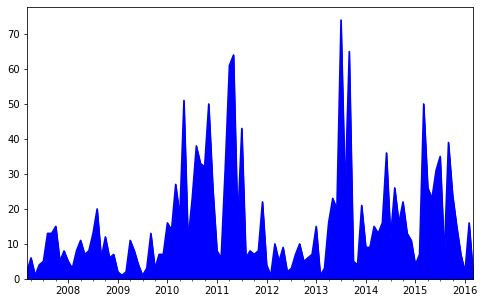

In [74]:
plt.figure(figsize=(8,5))
landslides['parsed_date'].value_counts().resample('M').sum().plot.area(color='b')
plt.show()

### Thank you for your time!